# Hidden Markov model distribution
Inherits From: Distribution

https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

In [1]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

from matplotlib import pylab as plt
%matplotlib inline

In [2]:
import tensorflow, tensorflow_probability
print(tensorflow.__version__)
print(tensorflow.keras.__version__)
print(tensorflow_probability.__version__)

2.3.0
2.4.0
0.11.0


In [3]:
tfd = tfp.distributions

In [4]:
# A simple weather model.

# Represent a cold day with 0 and a hot day with 1.
# Suppose the first day of a sequence has a 0.8 chance of being cold.
# We can model this using the categorical distribution:

initial_distribution = tfd.Categorical(probs=[0.8, 0.2])

# Suppose a cold day has a 30% chance of being followed by a hot day
# and a hot day has a 20% chance of being followed by a cold day.
# We can model this as:

transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])

# Suppose additionally that on each day the temperature is
# normally distributed with mean and standard deviation 0 and 5 on
# a cold day and mean and standard deviation 15 and 10 on a hot day.
# We can model this with:

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])

In [5]:
# We can combine these distributions into a single week long
# hidden Markov model with:
days = 7
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=days)

In [6]:
# The expected temperatures for each day are given by:
m = model.mean()  # shape [7], elements approach 9.0
print(m)

tf.Tensor([2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ], shape=(7,), dtype=float32)


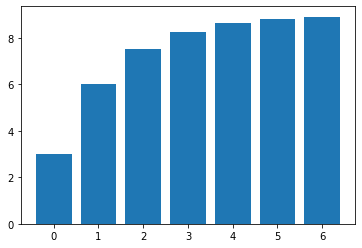

In [7]:
_ = plt.bar(np.arange(len(m)), m)

The log pdf of a week of temperature 0 is:

In [8]:
# The log pdf of a week of temperature 0 is:
model.log_prob(tf.zeros(shape=[days]))

<tf.Tensor: shape=(), dtype=float32, numpy=-20.120832>

In [9]:
tf.exp(model.log_prob(tf.zeros(shape=[days])))

<tf.Tensor: shape=(), dtype=float32, numpy=1.8265581e-09>